In [2]:
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import control as ct

In [3]:
%matplotlib nbagg
# only needed when developing python-control
%load_ext autoreload 
%autoreload 2

## Define continuous systems

In [4]:
w001rad = 1.    # 1 rad/s
w010rad = 10.   # 10 rad/s
w100rad = 100.  # 100 rad/s
w001hz = 2*sp.pi*1.    # 1 Hz
w010hz = 2*sp.pi*10.   # 10 Hz
w100hz = 2*sp.pi*100.  # 100 Hz
# First order systems
pt1_w001rad = ct.tf([1.], [1./w001rad, 1.])
display(pt1_w001rad)
pt1_w001hz = ct.tf([1.], [1./w001hz, 1.])
display(pt1_w001hz)
pt2_w001hz = ct.tf([1.], [1./w001hz**2,  1./w001hz, 1.])
display(pt2_w001hz)
pt1_w001hzi = ct.tf([1., 0.], [1./w001hz, 1.])
display(pt1_w001hzi)
# Second order system
pt5hz = ct.tf([1.], [1./w001hz, 1.]) * ct.tf([1.], 
                                             [1./w010hz**2,  
                                              1./w010hz, 1.]) * ct.tf([1.], 
                                                                      [1./w100hz**2,  
                                                                       1./w100hz, 1.])
display(pt5hz)



  1
-----
s + 1


      1
------------
0.1592 s + 1


            1
--------------------------
0.02533 s^2 + 0.1592 s + 1


      s
------------
0.1592 s + 1


                                     1
---------------------------------------------------------------------------
1.021e-10 s^5 + 7.122e-08 s^4 + 4.519e-05 s^3 + 0.003067 s^2 + 0.1767 s + 1

## Define sampled systems

In [5]:
sampleTime = 0.001
display('Nyquist frequency: {:.0f} Hz, {:.0f} rad/sec'.format(1./sampleTime /2., 2*sp.pi*1./sampleTime /2.))

'Nyquist frequency: 500 Hz, 3142 rad/sec'

In [6]:
pt1_w001rads = ct.sample_system(pt1_w001rad, sampleTime, 'tustin')
display(pt1_w001rads)
pt1_w001hzs = ct.sample_system(pt1_w001hz, sampleTime, 'tustin')
display(pt1_w001hzs)
pt1_w001hzis = ct.sample_system(pt1_w001hzi, sampleTime, 'tustin')
display(pt1_w001hzis)
pt2_w001hzs = ct.sample_system(pt2_w001hz, sampleTime, 'tustin')
display(pt2_w001hzs)
pt5s = ct.sample_system(pt5hz, sampleTime, 'tustin')
display(pt5s)
pt5sh = ct.sample_system(pt5hz, sampleTime/4, 'tustin')
display(pt5sh)


0.0004998 z + 0.0004998
-----------------------
       z - 0.999

dt = 0.001


0.003132 z + 0.003132
---------------------
      z - 0.9937

dt = 0.001


6.264 z - 6.264
---------------
  z - 0.9937

dt = 0.001


9.839e-06 z^2 + 1.968e-05 z + 9.839e-06
---------------------------------------
        z^2 - 1.994 z + 0.9937

dt = 0.001


2.091e-07 z^5 + 1.046e-06 z^4 + 2.091e-06 z^3 + 2.091e-06 z^2 + 1.046e-06 z + 2.091e-07
---------------------------------------------------------------------------------------
               z^5 - 4.205 z^4 + 7.155 z^3 - 6.212 z^2 + 2.78 z - 0.5182

dt = 0.001


2.731e-10 z^5 + 1.366e-09 z^4 + 2.731e-09 z^3 + 2.731e-09 z^2 + 1.366e-09 z + 2.731e-10
---------------------------------------------------------------------------------------
              z^5 - 4.815 z^4 + 9.286 z^3 - 8.968 z^2 + 4.337 z - 0.8405

dt = 0.00025

## Draw Bode plots

### PT1 1rad/s plot with x-axis representing angular frequencies

<IPython.core.display.Javascript object>


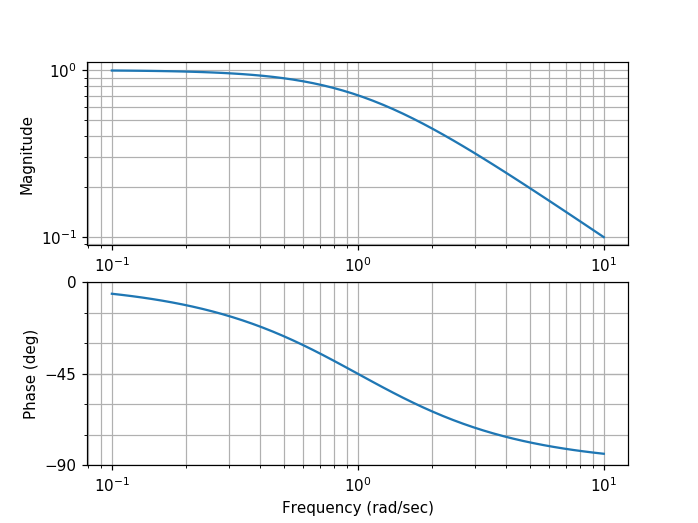

In [7]:
fig = plt.figure()
mag, phase, omega = ct.bode_plot(pt1_w001rad, Hz=False)

### PT1 1rad/s discrete 

<IPython.core.display.Javascript object>


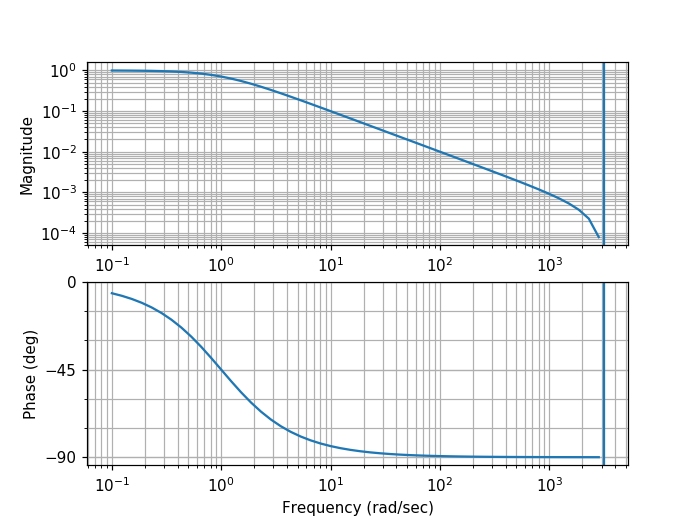

In [8]:
fig = plt.figure()
mag, phase, omega = ct.bode_plot(pt1_w001rads, Hz=False)

### PT1 1Hz with x-axis representing regular frequencies (by default)

<IPython.core.display.Javascript object>


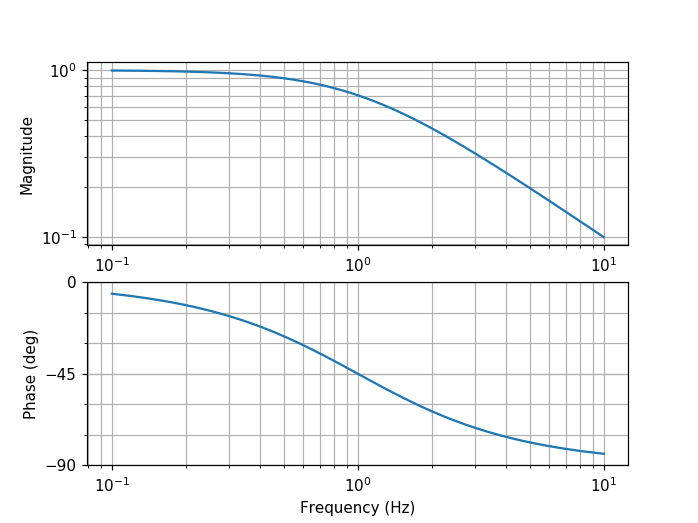

In [9]:
fig = plt.figure()
mag, phase, omega = ct.bode_plot(pt1_w001hz, Hz=True)

### PT1 1Hz discrete 

<IPython.core.display.Javascript object>


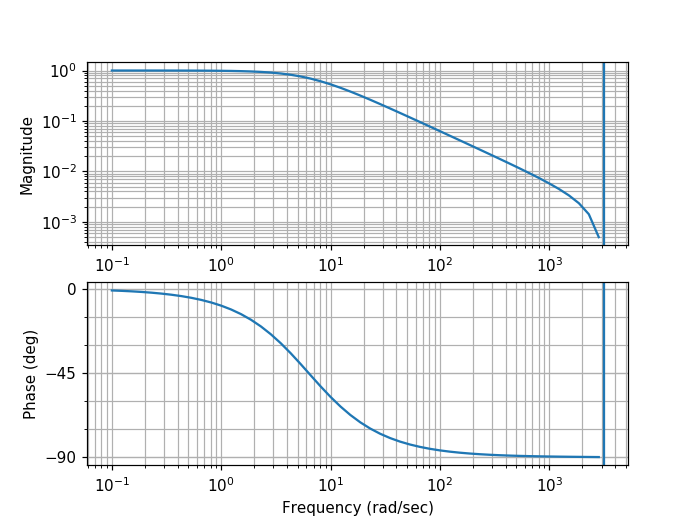

In [10]:
fig = plt.figure()
mag, phase, omega = ct.bode_plot(pt1_w001hzs)

### Bode plot with higher resolution

<IPython.core.display.Javascript object>


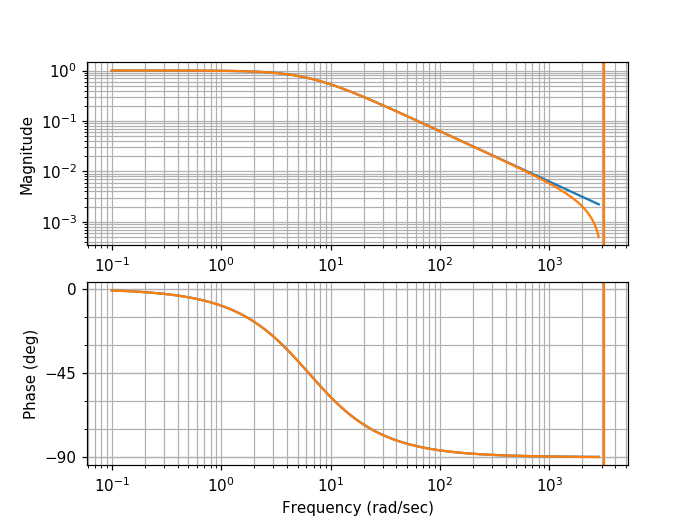

In [11]:
ct.config.bode_number_of_samples = 1000
fig = plt.figure()
mag, phase, omega = ct.bode_plot([pt1_w001hz, pt1_w001hzs])

### PT1 with additional integrator, continuous and discrete

<IPython.core.display.Javascript object>


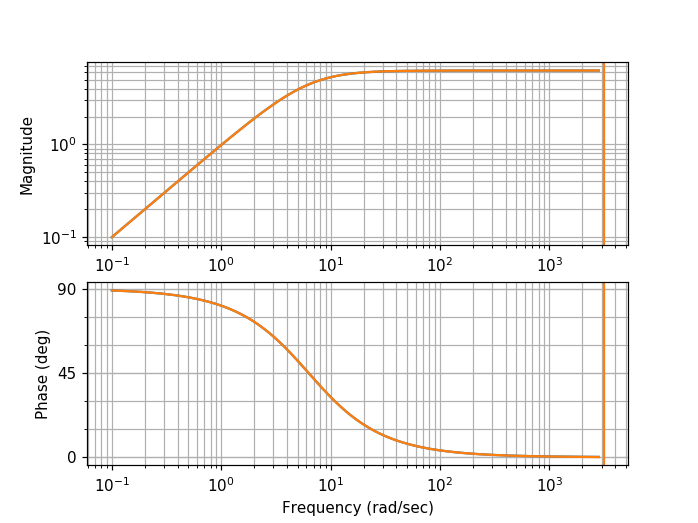

In [12]:
fig = plt.figure()
mag, phase, omega = ct.bode_plot([pt1_w001hzi, pt1_w001hzis])

### Combination of various systems

<IPython.core.display.Javascript object>


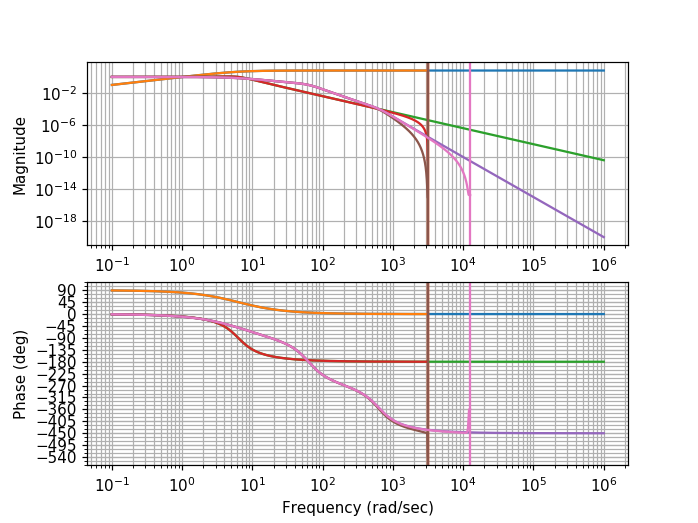

In [13]:
ct.config.bode_feature_periphery_decade  = 1.
ct.config.bode_number_of_samples  = 10000
fig = plt.figure()
mag, phase, omega = ct.bode_plot([pt1_w001hzi, pt1_w001hzis, pt2_w001hz, pt2_w001hzs, pt5hz, pt5s, pt5sh])

### Broader Bode plot

<IPython.core.display.Javascript object>


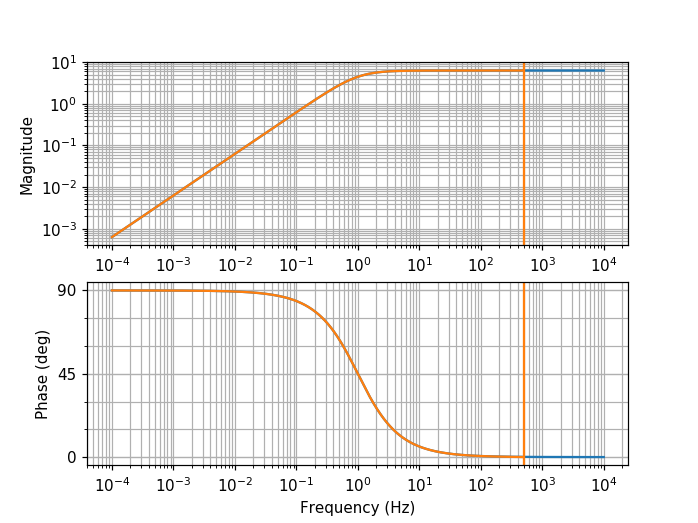

In [14]:
ct.config.bode_feature_periphery_decade  = 3.5
fig = plt.figure()
mag, phase, omega = ct.bode_plot([pt1_w001hzi, pt1_w001hzis], Hz=True)

### Phase plot in radian

<IPython.core.display.Javascript object>


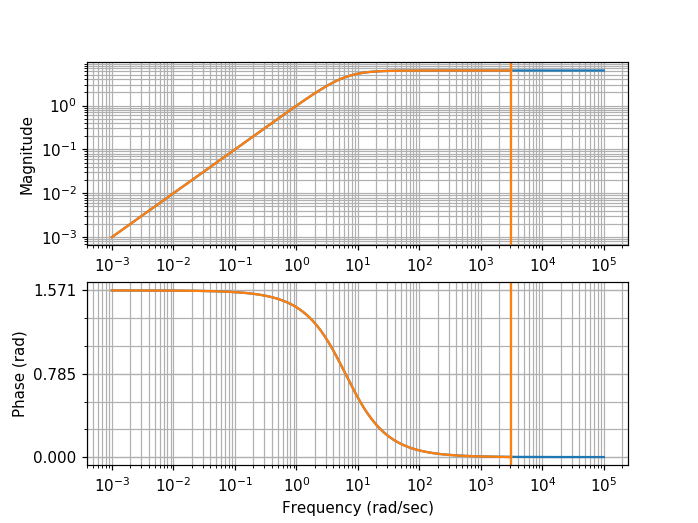

In [15]:
fig = plt.figure()
mag, phase, omega = ct.bode_plot([pt1_w001hzi, pt1_w001hzis], deg=False)

### Truncate Bode plot between frequencies bounds

<IPython.core.display.Javascript object>


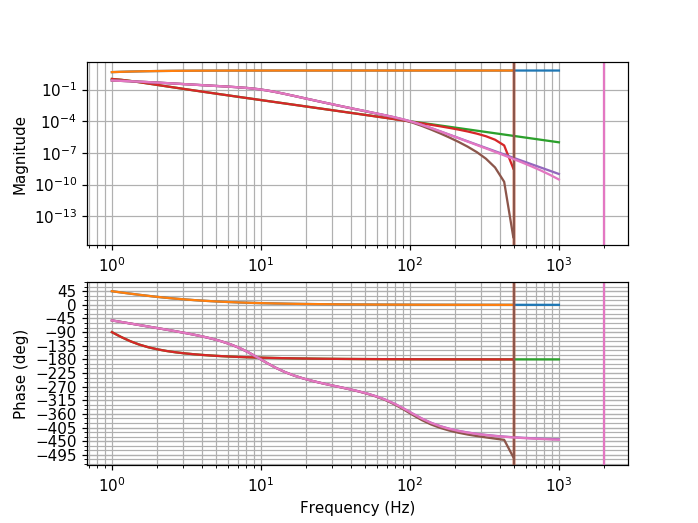

In [16]:
ct.config.bode_feature_periphery_decade  = 1.
ct.config.bode_number_of_samples  = 1000
fig = plt.figure()
mag, phase, omega = ct.bode_plot([pt1_w001hzi, pt1_w001hzis, pt2_w001hz, pt2_w001hzs, pt5hz, pt5s, pt5sh], Hz=True,
                                 omega_limits=(1.,1000.))

<IPython.core.display.Javascript object>


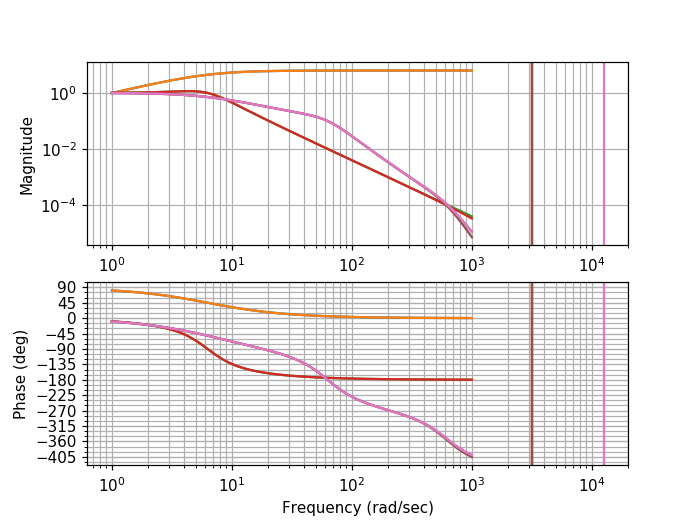

In [17]:
fig = plt.figure()
mag, phase, omega = ct.bode_plot([pt1_w001hzi, pt1_w001hzis, pt2_w001hz, pt2_w001hzs, pt5hz, pt5s, pt5sh], Hz=False,
                                 omega_limits=(1.,1000.))

### Nyquist plot

<IPython.core.display.Javascript object>


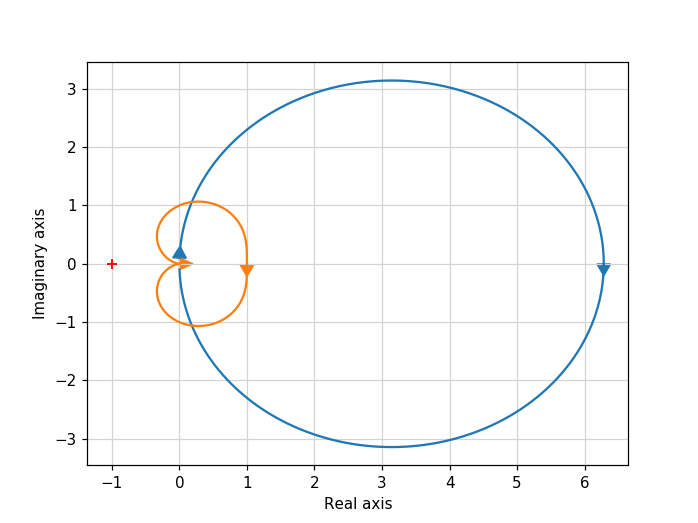

In [19]:
fig = plt.figure()
mag, phase, omega = ct.nyquist_plot([pt1_w001hzis, pt2_w001hz])